<a href="https://colab.research.google.com/github/BDR2939/NLP/blob/main/Display_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports 

In [ ]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
from IPython.display import display


import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

% matplotlib inline

# set path's

In [ ]:
# general folder path
drive_path = '/content/gdrive'
drive_saving_path = '/content/gdrive/My Drive'
drive.mount(drive_path)
main_path = os.path.join(drive_saving_path, 'NLP_project')
load_path = os.path.join(main_path, 'parameters grid search')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Plot learning rate results with constant batch size, original loss

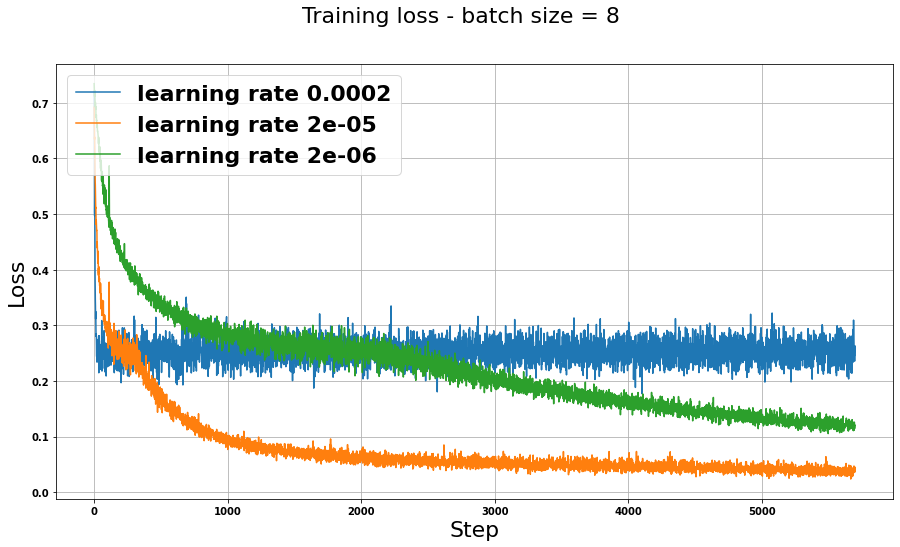

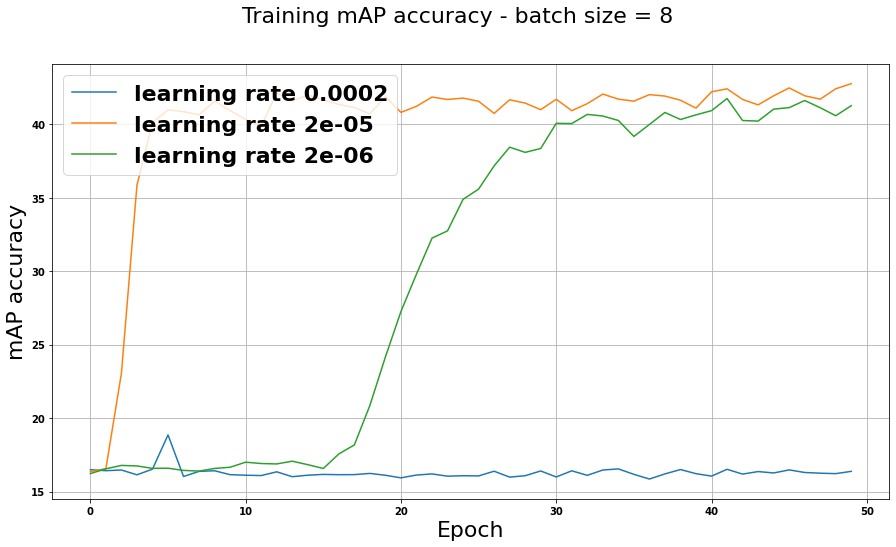

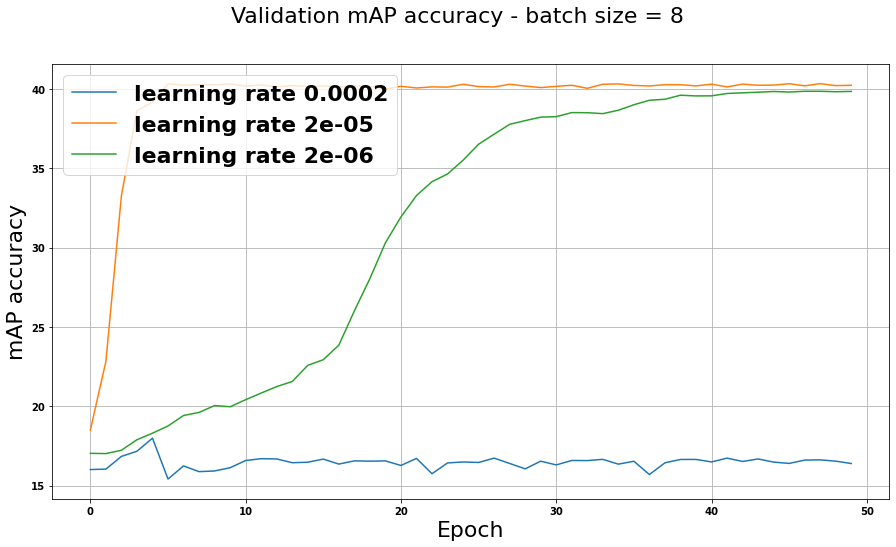

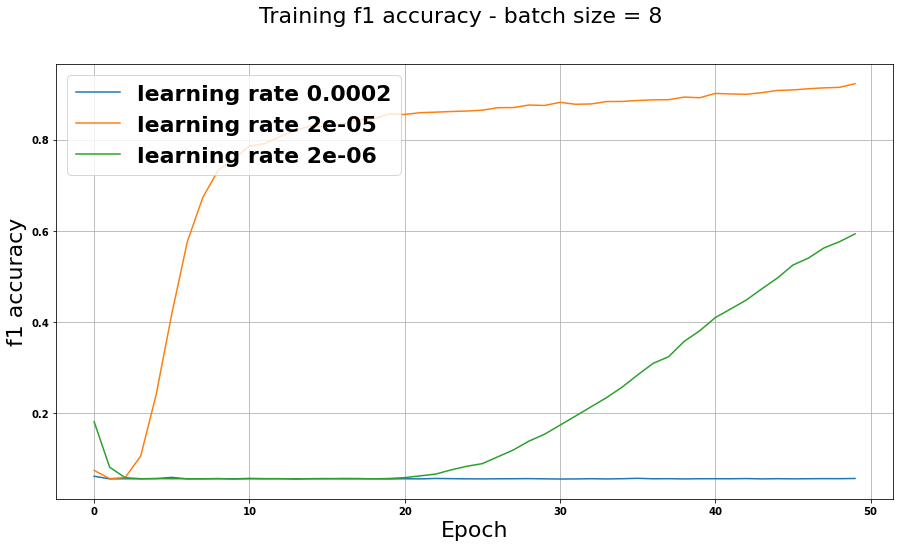

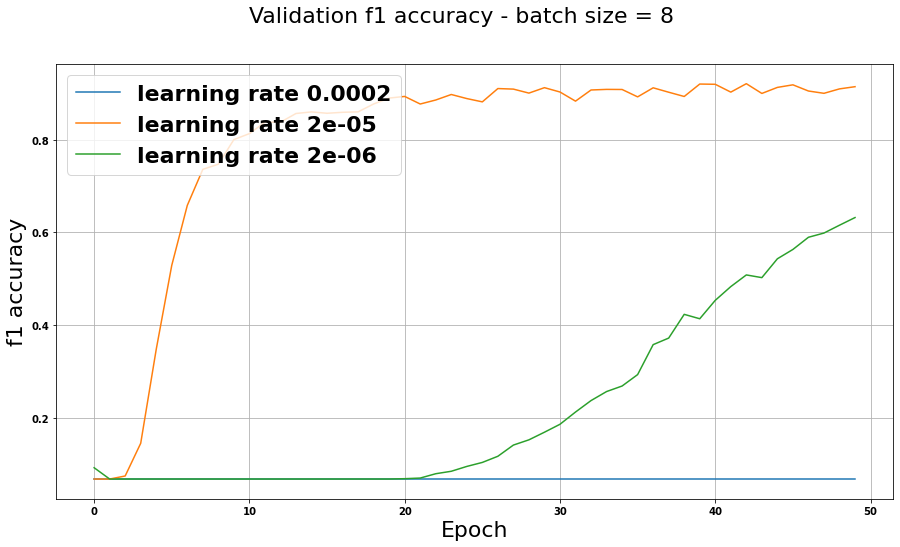

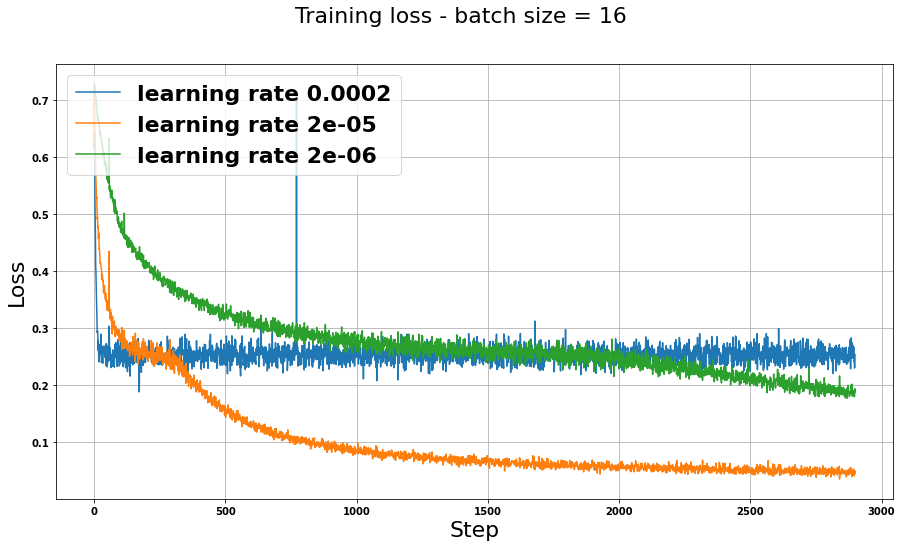

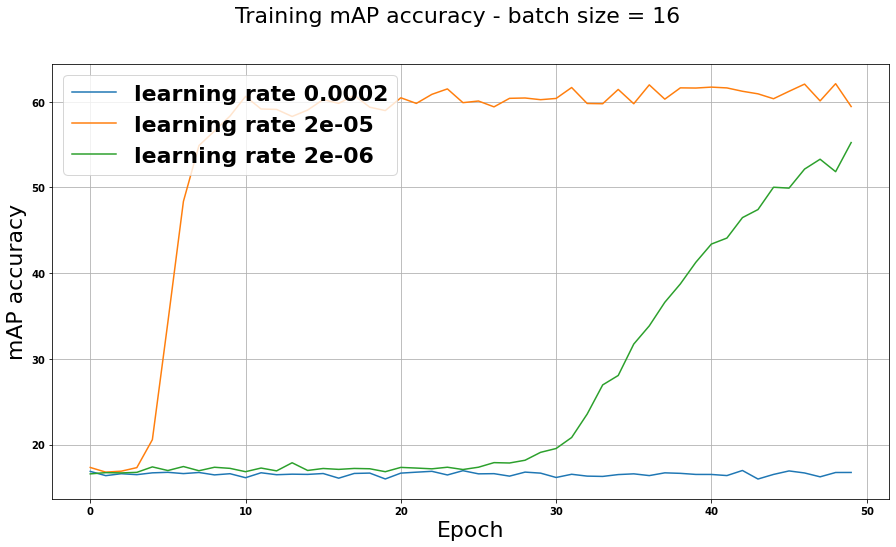

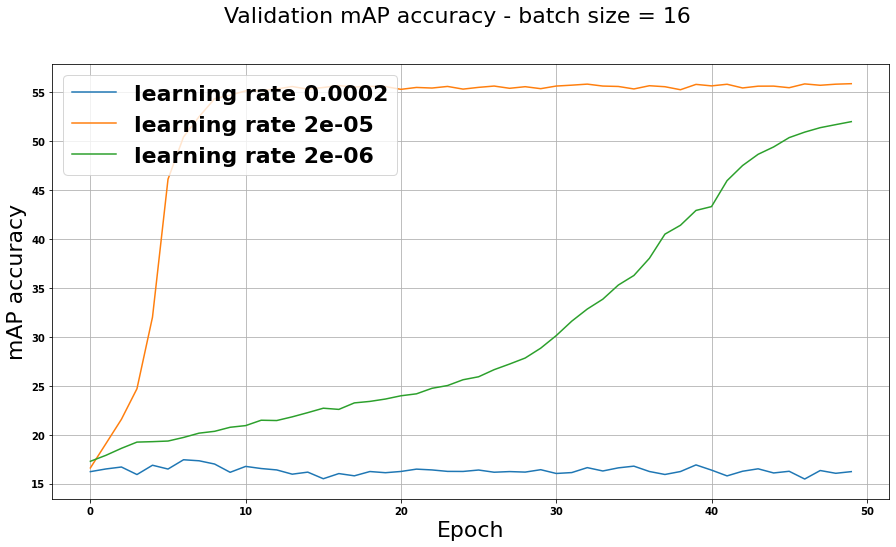

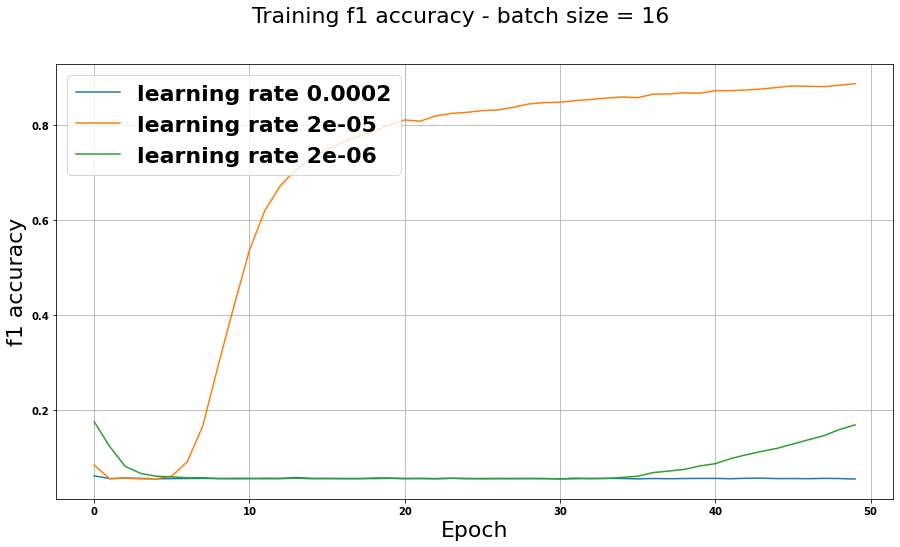

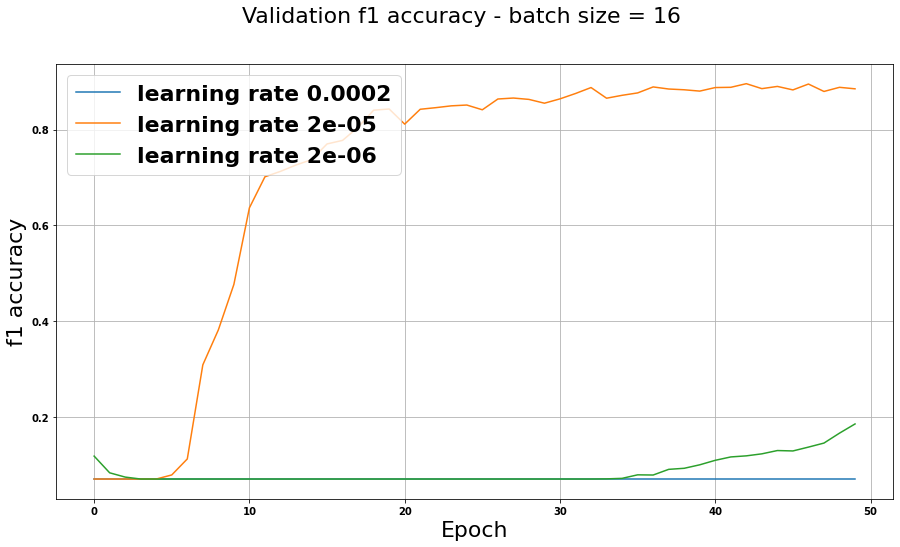

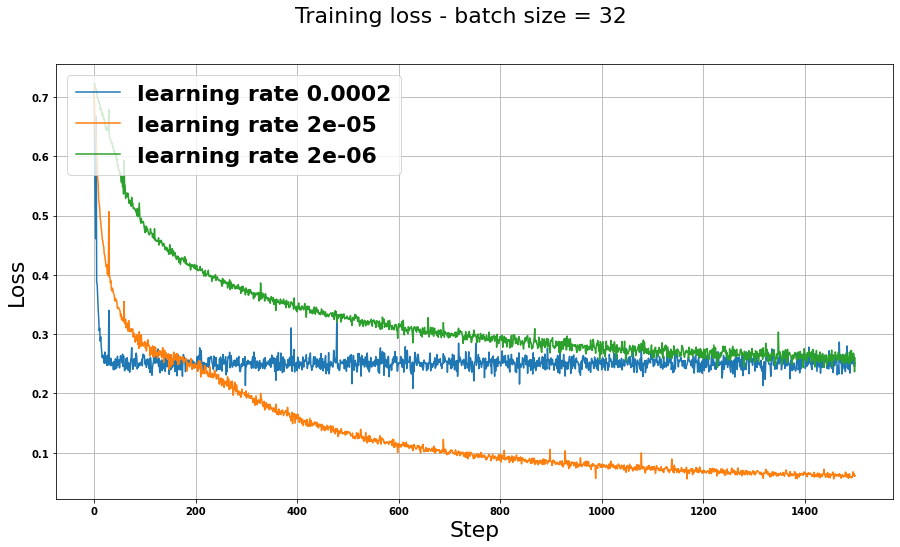

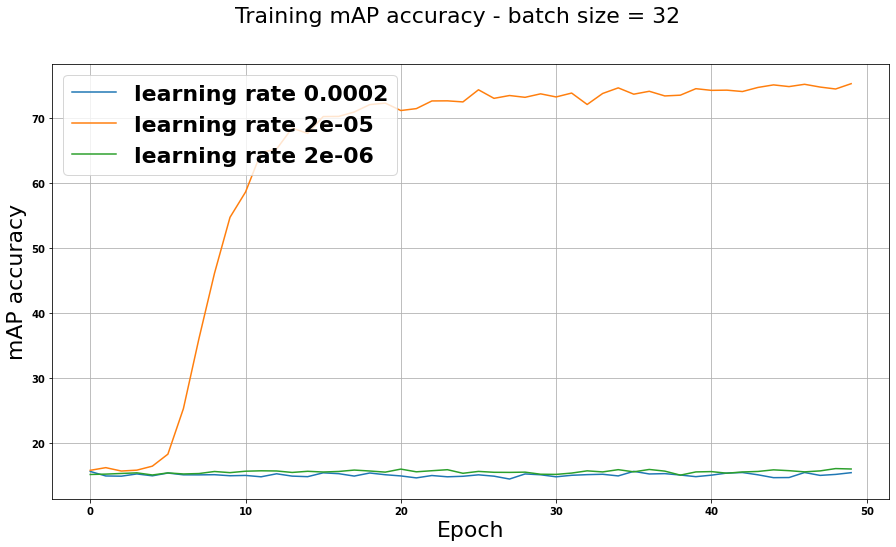

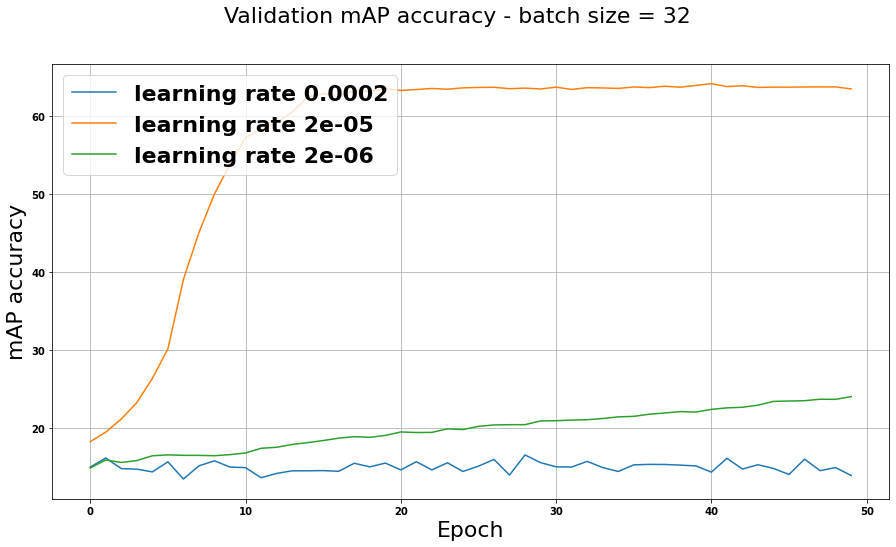

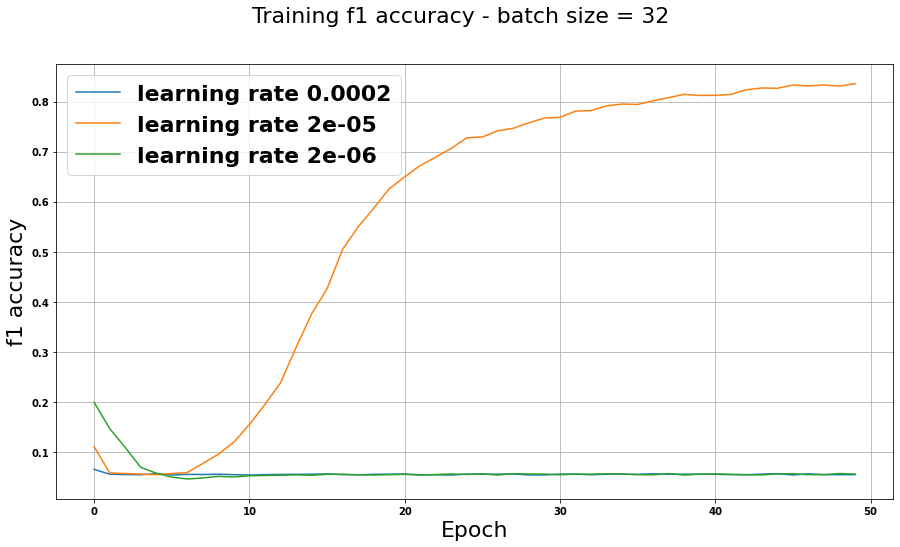

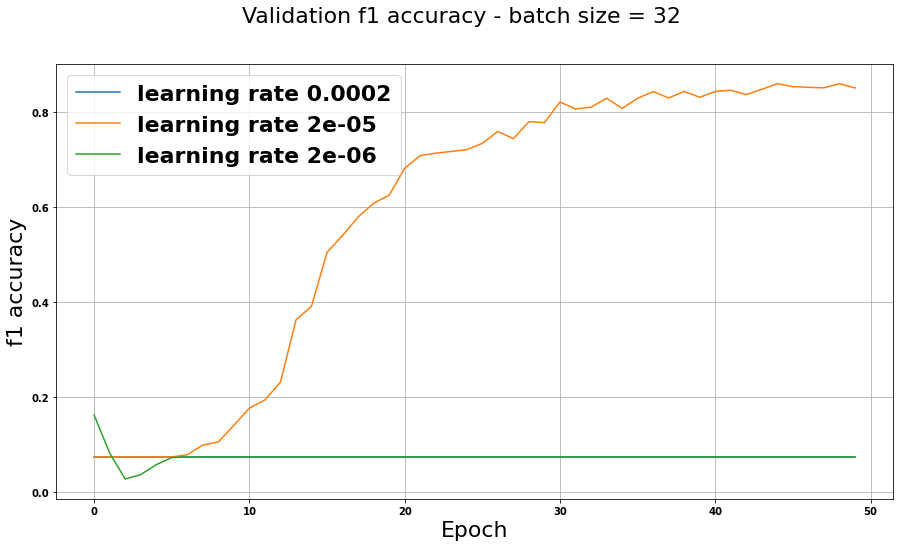

In [ ]:
learning_rates = [2e-4, 2e-5, 2e-6]
batch_sizes = [8, 16, 32]
use_default_loss = True
epochs = 50

for batch_size in batch_sizes:

  fig1, ax1 = plt.subplots(1, figsize=(15,8))
  fig1.suptitle(f'Training loss - batch size = {batch_size}', fontsize=22)
  ax1.set_xlabel("Step", fontsize=22)
  ax1.set_ylabel("Loss", fontsize=22)

  fig2, ax2 = plt.subplots(1, figsize=(15,8))
  fig2.suptitle(f'Training mAP accuracy - batch size = {batch_size}', fontsize=22)
  ax2.set_xlabel("Epoch", fontsize=22)
  ax2.set_ylabel("mAP accuracy", fontsize=22)

  fig3, ax3 = plt.subplots(1, figsize=(15,8))
  fig3.suptitle(f'Validation mAP accuracy - batch size = {batch_size}', fontsize=22)
  ax3.set_xlabel("Epoch", fontsize=22)
  ax3.set_ylabel("mAP accuracy", fontsize=22)

  fig4, ax4 = plt.subplots(1, figsize=(15,8))
  fig4.suptitle(f'Training f1 accuracy - batch size = {batch_size}', fontsize=22)
  ax4.set_xlabel("Epoch", fontsize=22)
  ax4.set_ylabel("f1 accuracy", fontsize=22)

  fig5, ax5 = plt.subplots(1, figsize=(15,8))
  fig5.suptitle(f'Validation f1 accuracy - batch size = {batch_size}', fontsize=22)
  ax5.set_xlabel("Epoch", fontsize=22) 
  ax5.set_ylabel("f1 accuracy", fontsize=22)
  
  for lr in learning_rates:

    file_names = [f'loss_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'train_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'train_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

    for i, filename in enumerate(file_names):
      file_path = os.path.join(load_path, filename)
      with open(file_path) as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]
        lines = [float(line) for line in lines]
        exec(f"ax{i+1}.plot(lines, label = f'learning rate {lr}')")

  ax1.legend(loc=2, prop={'size': 22})
  ax1.grid()
  ax2.legend(loc=2, prop={'size': 22})
  ax2.grid()
  ax3.legend(loc=2, prop={'size': 22})
  ax3.grid()
  ax4.legend(loc=2, prop={'size': 22})
  ax4.grid()
  ax5.legend(loc=2, prop={'size': 22})
  ax5.grid()

  plt.show(fig1)
  plt.show(fig2)
  plt.show(fig3)
  plt.show(fig4)
  plt.show(fig5)

In [ ]:
learning_rates = [2e-4, 2e-5, 2e-6]
learning_rates_text = ['2e-4', '2e-5', '2e-6']
batch_sizes = [8, 16, 32]
use_default_loss = True
epochs = 50

train_mAP_acc = pd.DataFrame(columns=learning_rates_text, index=batch_sizes)
validation_mAP_acc = pd.DataFrame(columns=learning_rates_text, index=batch_sizes)
train_f1_acc = pd.DataFrame(columns=learning_rates_text, index=batch_sizes)
validation_f1_acc = pd.DataFrame(columns=learning_rates_text, index=batch_sizes)

for batch_size in batch_sizes:
  
  for i, lr in enumerate(learning_rates):

    file_names = [f'train_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'train_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

    for j, filename in enumerate(file_names):
      file_path = os.path.join(load_path, filename)
      df = pd.read_csv(file_path, sep=" ", header=None)
      if j == 0:
        train_mAP_acc.loc[batch_size, learning_rates_text[i]] = max(df[0])
      
      elif j == 1:
        validation_mAP_acc.loc[batch_size, learning_rates_text[i]] = max(df[0])

      elif j == 2:
        train_f1_acc.loc[batch_size, learning_rates_text[i]] = max(df[0])
      
      else:
        validation_f1_acc.loc[batch_size, learning_rates_text[i]] = max(df[0])

print('\ntraining mAP acc results')
display(train_mAP_acc)
print('\nvalidation mAP acc results')
display(validation_mAP_acc)
print('\ntraining f1 acc results')
display(train_f1_acc)
print('\nvalidation f1 acc results')
display(validation_f1_acc)


      


training mAP acc results


,2e-4,2e-5,2e-6
8,18.852856,42.758384,41.749168
16,16.979561,62.101556,55.231757
32,15.628536,75.241943,16.052839



validation mAP acc results


,2e-4,2e-5,2e-6
8,17.985972,40.334051,39.856369
16,17.431354,55.889575,52.007605
32,16.594243,64.192295,24.070721



training f1 acc results


,2e-4,2e-5,2e-6
8,0.061961,0.922437,0.59321
16,0.061232,0.88687,0.175432
32,0.065003,0.835623,0.199041



validation f1 acc results


,2e-4,2e-5,2e-6
8,0.067808,0.920851,0.632005
16,0.070174,0.89591,0.185218
32,0.074709,0.8603,0.162745


# Plot learning rate results with constant batch size, ASL:

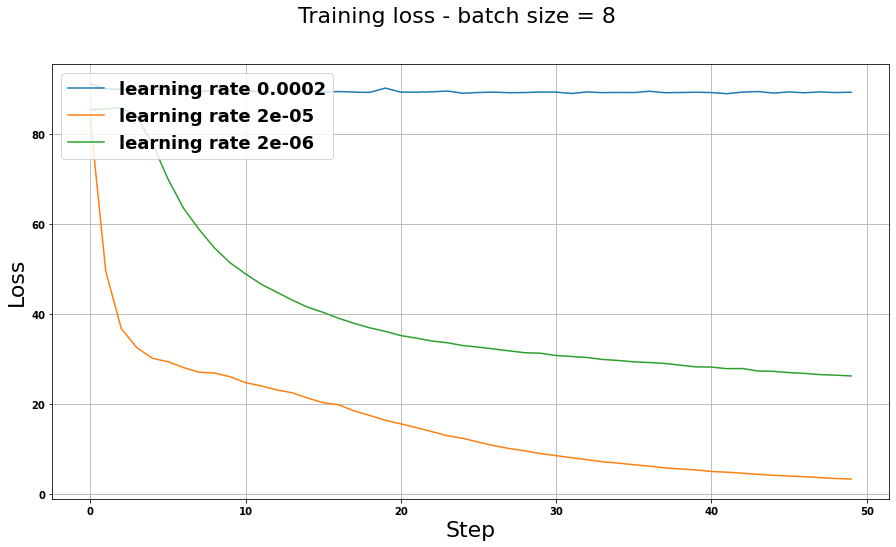

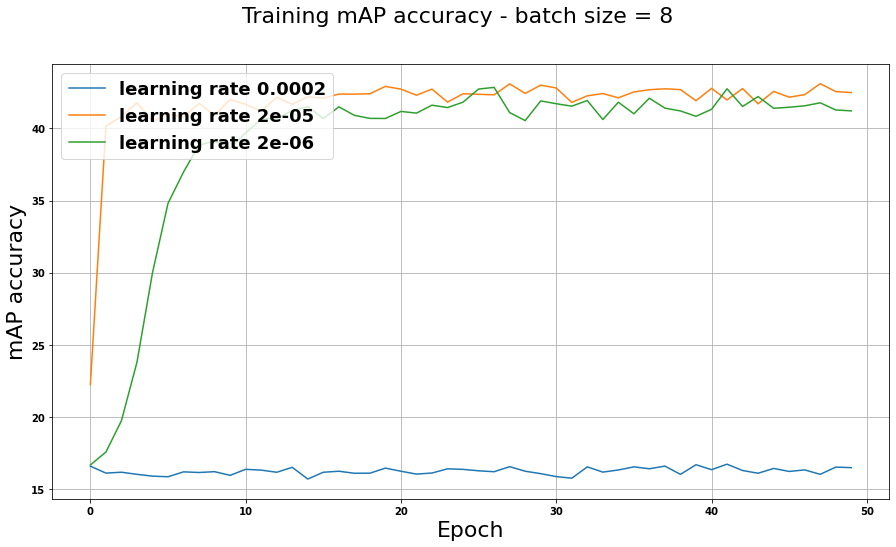

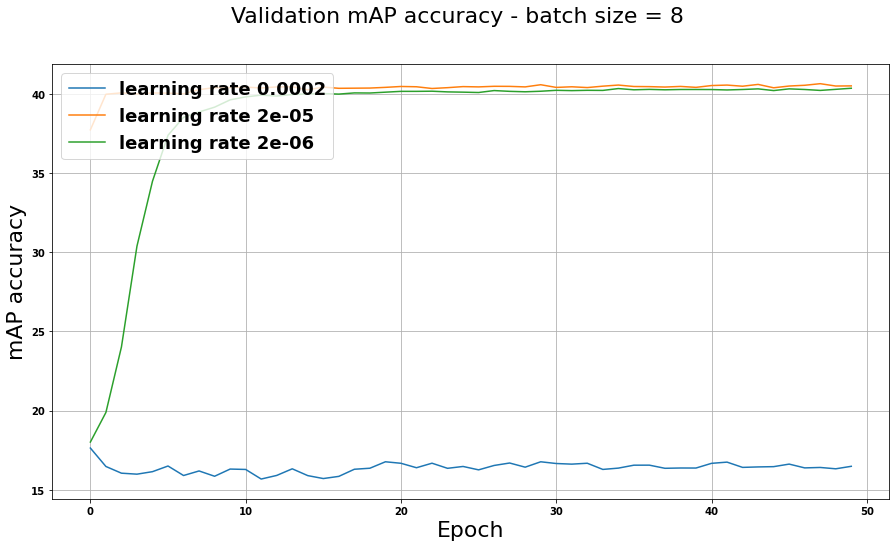

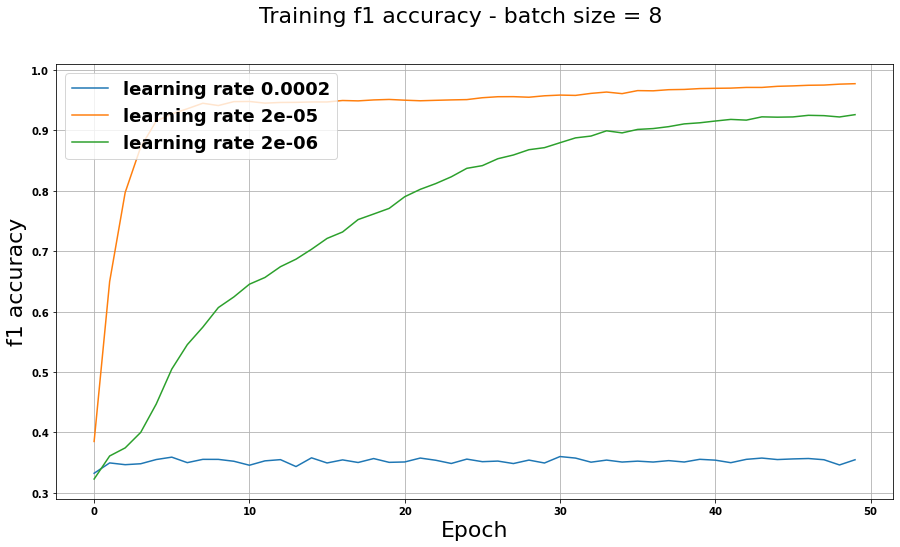

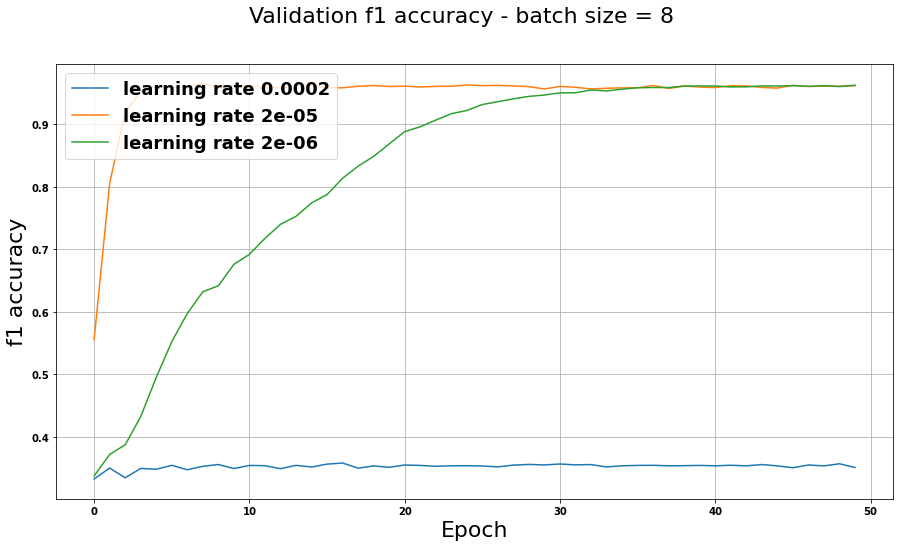

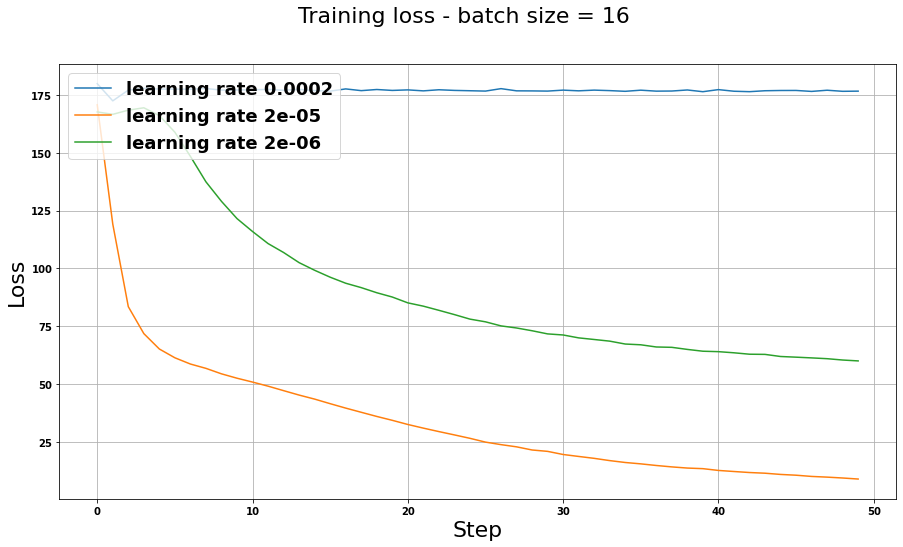

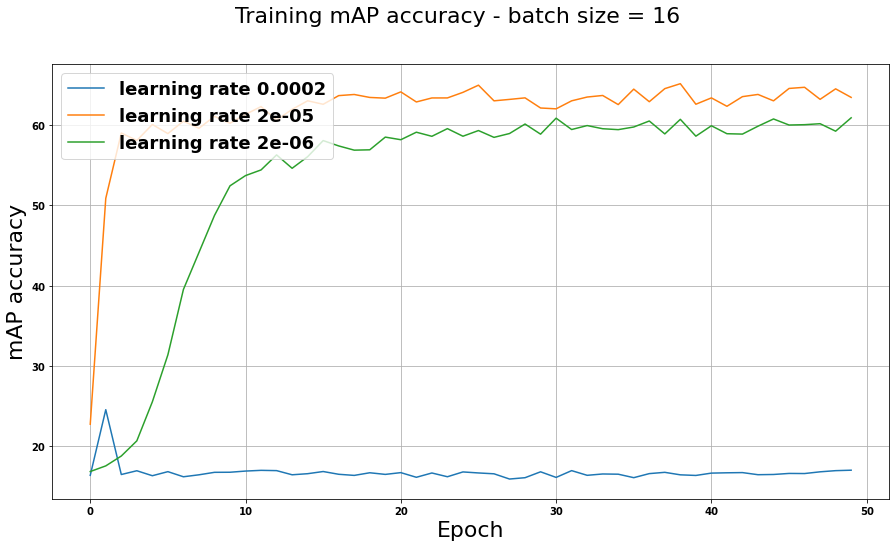

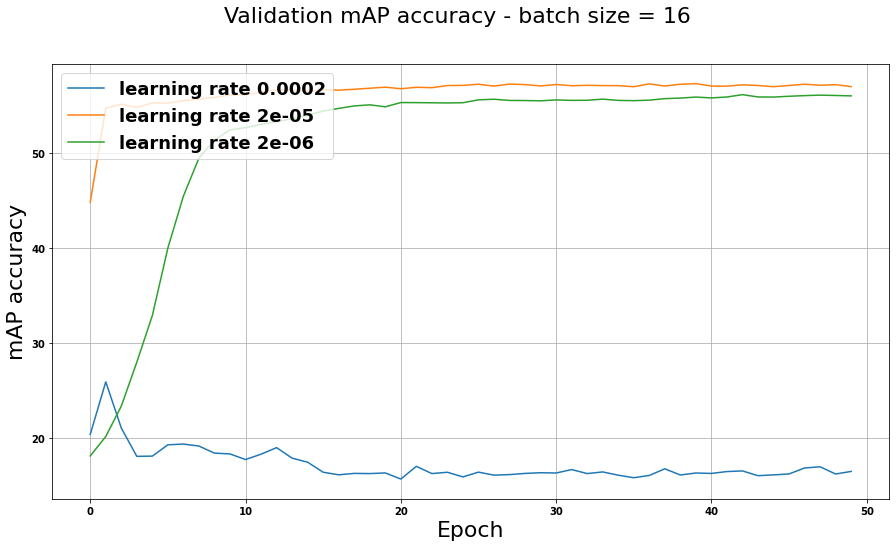

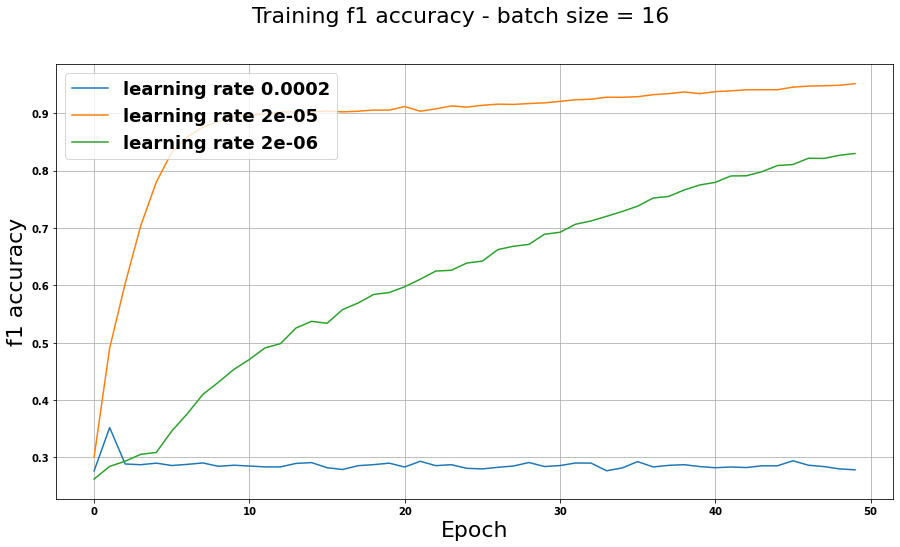

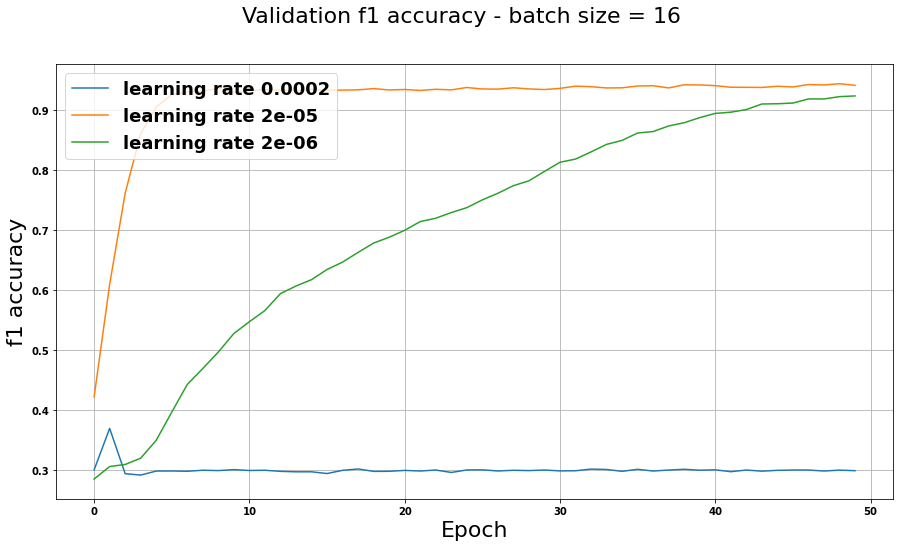

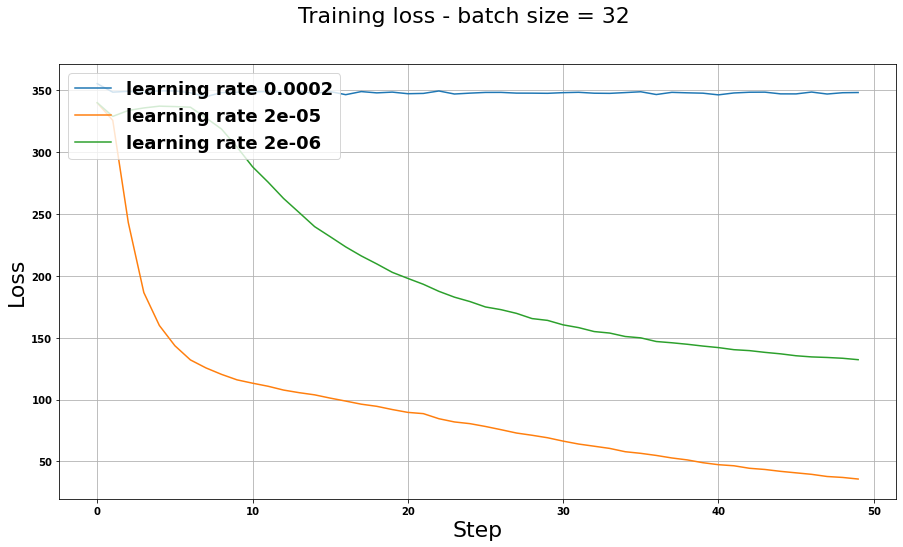

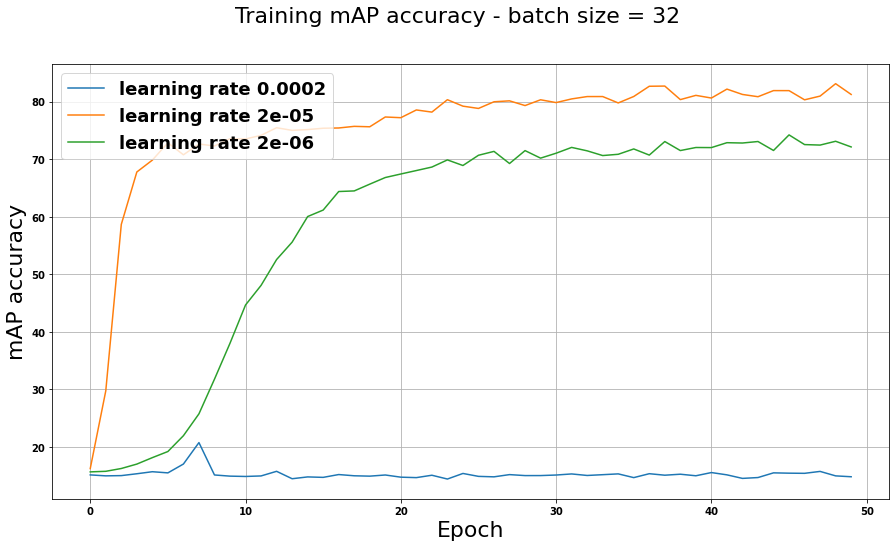

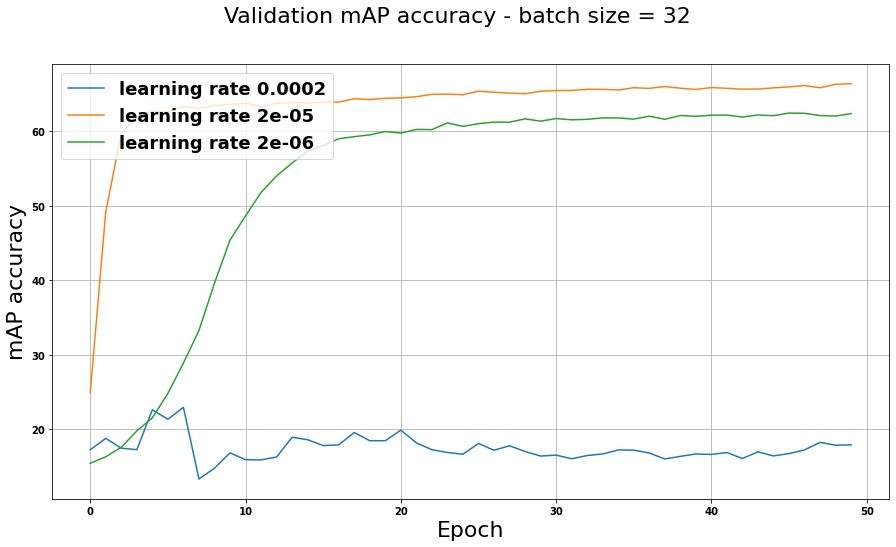

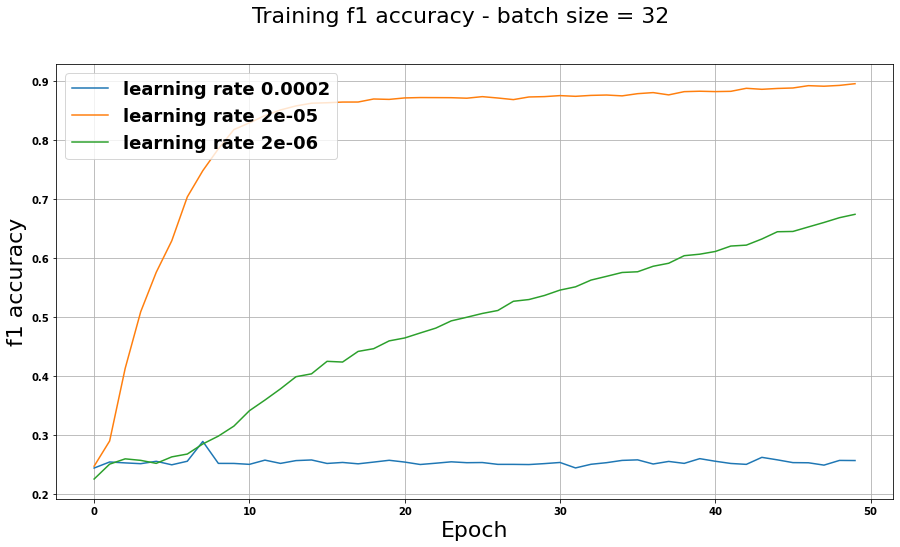

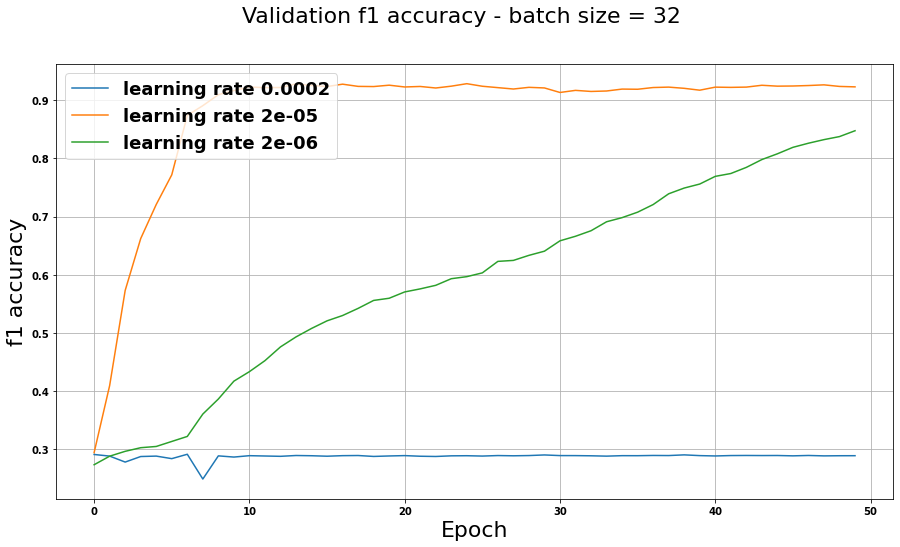

In [ ]:
learning_rates = [2e-4, 2e-5, 2e-6]
batch_sizes = [8, 16, 32]
use_default_loss = False
epochs = 50

for batch_size in batch_sizes:

  fig1, ax1 = plt.subplots(1, figsize=(15,8))
  fig1.suptitle(f'Training loss - batch size = {batch_size}', fontsize=22)
  ax1.set_xlabel("Step", fontsize=22)
  ax1.set_ylabel("Loss", fontsize=22)

  fig2, ax2 = plt.subplots(1, figsize=(15,8))
  fig2.suptitle(f'Training mAP accuracy - batch size = {batch_size}', fontsize=22)
  ax2.set_xlabel("Epoch", fontsize=22)
  ax2.set_ylabel("mAP accuracy", fontsize=22)

  fig3, ax3 = plt.subplots(1, figsize=(15,8))
  fig3.suptitle(f'Validation mAP accuracy - batch size = {batch_size}', fontsize=22)
  ax3.set_xlabel("Epoch", fontsize=22)
  ax3.set_ylabel("mAP accuracy", fontsize=22)

  fig4, ax4 = plt.subplots(1, figsize=(15,8))
  fig4.suptitle(f'Training f1 accuracy - batch size = {batch_size}', fontsize=22)
  ax4.set_xlabel("Epoch", fontsize=22)
  ax4.set_ylabel("f1 accuracy", fontsize=22)

  fig5, ax5 = plt.subplots(1, figsize=(15,8))
  fig5.suptitle(f'Validation f1 accuracy - batch size = {batch_size}', fontsize=22)
  ax5.set_xlabel("Epoch", fontsize=22) 
  ax5.set_ylabel("f1 accuracy", fontsize=22)
  
  for lr in learning_rates:

    file_names = [f'loss_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'train_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'train_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

    for i, filename in enumerate(file_names):
      file_path = os.path.join(load_path, filename)
      with open(file_path) as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]
        lines = [float(line) for line in lines]
        exec(f"ax{i+1}.plot(lines, label = f'learning rate {lr}')")

  ax1.legend(loc=2, prop={'size': 18})
  ax1.grid()
  ax2.legend(loc=2, prop={'size': 18})
  ax2.grid()
  ax3.legend(loc=2, prop={'size': 18})
  ax3.grid()
  ax4.legend(loc=2, prop={'size': 18})
  ax4.grid()
  ax5.legend(loc=2, prop={'size': 18})
  ax5.grid()

  plt.show(fig1)
  plt.show(fig2)
  plt.show(fig3)
  plt.show(fig4)
  plt.show(fig5)

In [ ]:
learning_rates = [2e-4, 2e-5, 2e-6]
learning_rates_text = ['2e-4', '2e-5', '2e-6']
batch_sizes = [8, 16, 32]
use_default_loss = True
epochs = 50

train_mAP_acc = pd.DataFrame(columns=learning_rates_text, index=batch_sizes)
validation_mAP_acc = pd.DataFrame(columns=learning_rates_text, index=batch_sizes)
train_f1_acc = pd.DataFrame(columns=learning_rates_text, index=batch_sizes)
validation_f1_acc = pd.DataFrame(columns=learning_rates_text, index=batch_sizes)

for batch_size in batch_sizes:
  
  for i, lr in enumerate(learning_rates):

    file_names = [f'train_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'train_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

    for j, filename in enumerate(file_names):
      file_path = os.path.join(load_path, filename)
      df = pd.read_csv(file_path, sep=" ", header=None)
      if j == 0:
        train_mAP_acc.loc[batch_size, learning_rates_text[i]] = max(df[0])
      
      elif j == 1:
        validation_mAP_acc.loc[batch_size, learning_rates_text[i]] = max(df[0])

      elif j == 2:
        train_f1_acc.loc[batch_size, learning_rates_text[i]] = max(df[0])
      
      else:
        validation_f1_acc.loc[batch_size, learning_rates_text[i]] = max(df[0])

print('\ntraining mAP acc results')
display(train_mAP_acc)
print('\nvalidation mAP acc results')
display(validation_mAP_acc)
print('\ntraining f1 acc results')
display(train_f1_acc)
print('\nvalidation f1 acc results')
display(validation_f1_acc)


      


training mAP acc results


,2e-4,2e-5,2e-6
8,16.713263,43.102749,42.846276
16,24.556744,65.139279,60.890411
32,20.738404,83.10462,74.205662



validation mAP acc results


,2e-4,2e-5,2e-6
8,17.627823,40.659107,40.370657
16,25.880855,57.298496,56.141908
32,22.957376,66.394729,62.451167



training f1 acc results


,2e-4,2e-5,2e-6
8,0.360113,0.977361,0.9261
16,0.351795,0.951552,0.829823
32,0.288587,0.895462,0.673874



validation f1 acc results


,2e-4,2e-5,2e-6
8,0.358465,0.964609,0.962207
16,0.369484,0.944479,0.924056
32,0.291664,0.928236,0.847415


### We can clearly see that learning rate 2e-5 performs better in both losses and for every batch size, hence focusing on that learning rate for choosing batch size

# Plot batch size results with learning rate 2e-5, original loss:

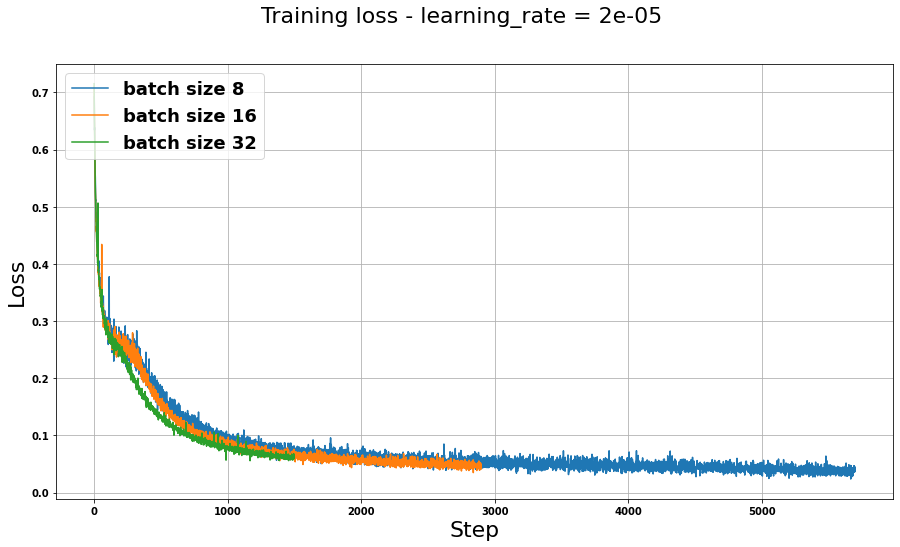

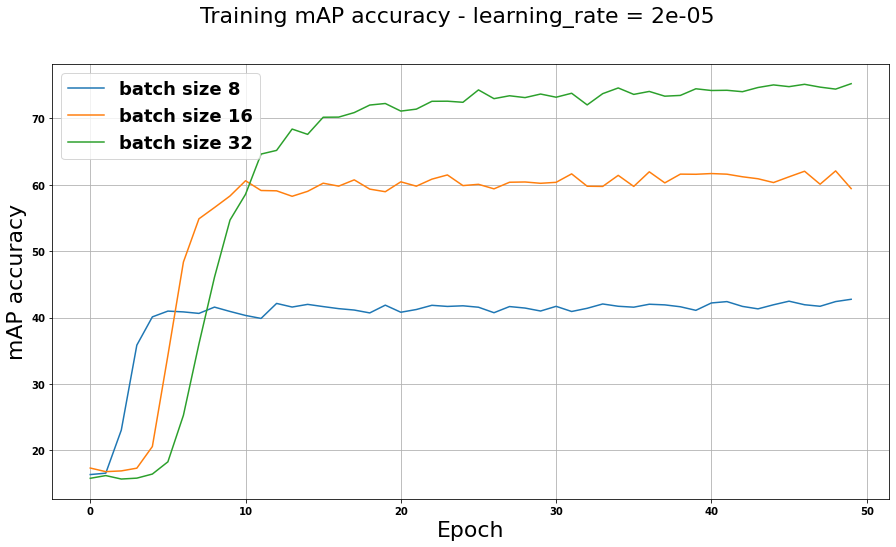

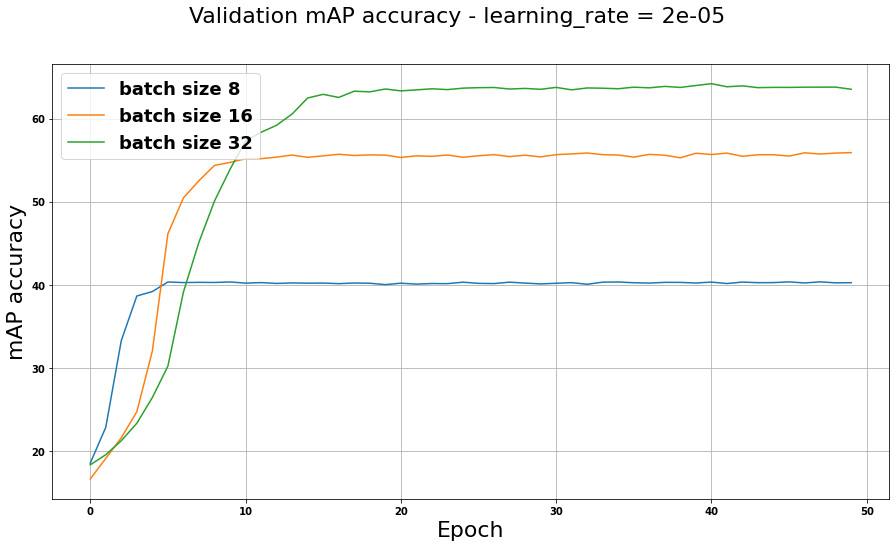

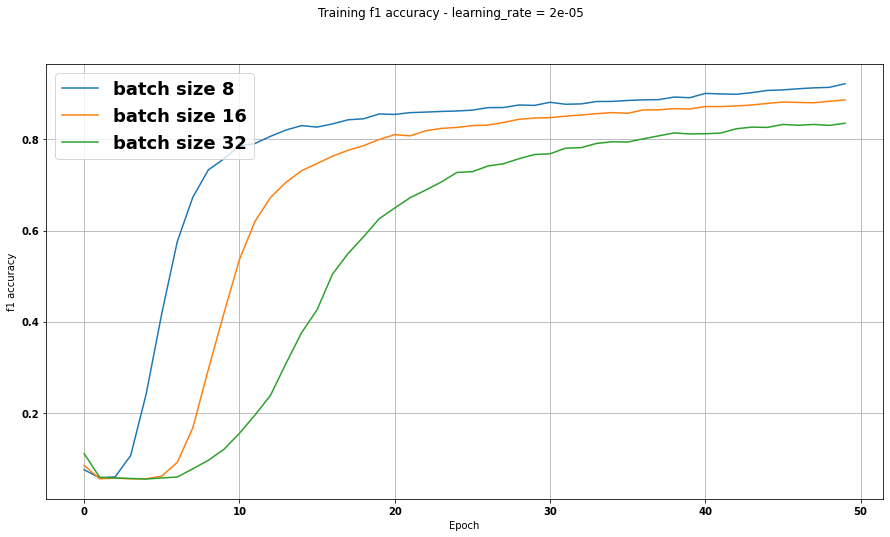

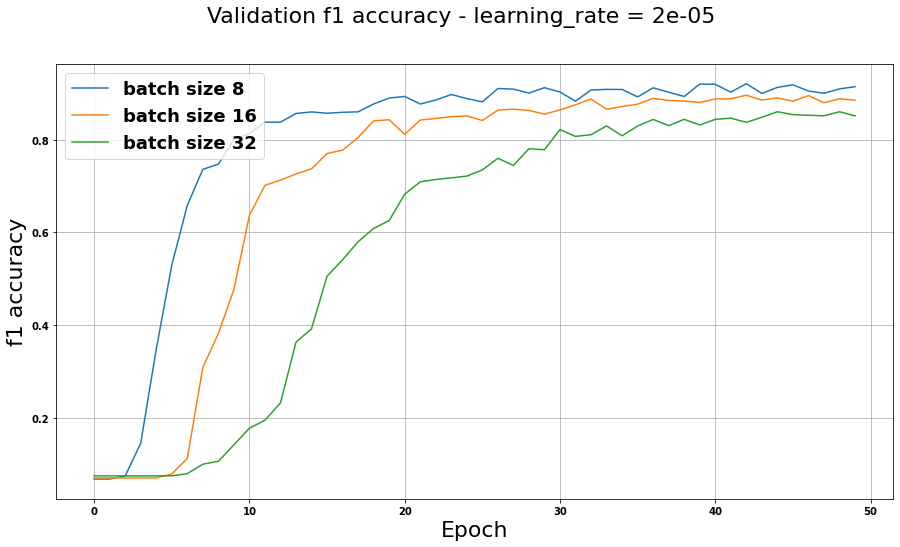

In [ ]:
batch_sizes = [8, 16, 32]
use_default_loss = True
epochs = 50
lr = 2e-5

fig1, ax1 = plt.subplots(1, figsize=(15,8))
fig1.suptitle(f'Training loss - learning_rate = {lr}', fontsize=22)
ax1.set_xlabel("Step", fontsize=22)
ax1.set_ylabel("Loss", fontsize=22)

fig2, ax2 = plt.subplots(1, figsize=(15,8))
fig2.suptitle(f'Training mAP accuracy - learning_rate = {lr}', fontsize=22)
ax2.set_xlabel("Epoch", fontsize=22)
ax2.set_ylabel("mAP accuracy", fontsize=22)

fig3, ax3 = plt.subplots(1, figsize=(15,8))
fig3.suptitle(f'Validation mAP accuracy - learning_rate = {lr}', fontsize=22)
ax3.set_xlabel("Epoch", fontsize=22)
ax3.set_ylabel("mAP accuracy", fontsize=22)

fig4, ax4 = plt.subplots(1, figsize=(15,8))
fig4.suptitle(f'Training f1 accuracy - learning_rate = {lr}')
ax4.set_xlabel("Epoch")
ax4.set_ylabel("f1 accuracy")

fig5, ax5 = plt.subplots(1, figsize=(15,8))
fig5.suptitle(f'Validation f1 accuracy - learning_rate = {lr}', fontsize=22)
ax5.set_xlabel("Epoch", fontsize=22) 
ax5.set_ylabel("f1 accuracy", fontsize=22)

for batch_size in batch_sizes:

  file_names = [f'loss_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                f'train_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                f'validation_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                f'train_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                f'validation_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

  for i, filename in enumerate(file_names):
    file_path = os.path.join(load_path, filename)
    with open(file_path) as file:
      lines = file.readlines()
      lines = [line.rstrip() for line in lines]
      lines = [float(line) for line in lines]
      exec(f"ax{i+1}.plot(lines, label = f'batch size {batch_size}')")

ax1.legend(loc=2, prop={'size': 18})
ax1.grid()
ax2.legend(loc=2, prop={'size': 18})
ax2.grid()
ax3.legend(loc=2, prop={'size': 18})
ax3.grid()
ax4.legend(loc=2, prop={'size': 18})
ax4.grid()
ax5.legend(loc=2, prop={'size': 18})
ax5.grid()

plt.show(fig1)
plt.show(fig2)
plt.show(fig3)
plt.show(fig4)
plt.show(fig5)

In [ ]:
lr = 2e-5
learning_rates_text = ['2e-5']
batch_sizes = [8, 16, 32]
use_default_loss = True
epochs = 50

train_mAP_acc = pd.DataFrame(columns=batch_sizes, index=learning_rates_text)
validation_mAP_acc = pd.DataFrame(columns=batch_sizes, index=learning_rates_text)
train_f1_acc = pd.DataFrame(columns=batch_sizes, index=learning_rates_text)
validation_f1_acc = pd.DataFrame(columns=batch_sizes, index=learning_rates_text)

for batch_size in batch_sizes:

    file_names = [f'train_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'train_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

    for j, filename in enumerate(file_names):
      file_path = os.path.join(load_path, filename)
      df = pd.read_csv(file_path, sep=" ", header=None)
      if j == 0:
        train_mAP_acc.loc[learning_rates_text[0], batch_size] = max(df[0])
      
      elif j == 1:
        validation_mAP_acc.loc[learning_rates_text[0], batch_size] = max(df[0])

      elif j == 2:
        train_f1_acc.loc[learning_rates_text[0], batch_size] = max(df[0])
      
      else:
        validation_f1_acc.loc[learning_rates_text[0], batch_size] = max(df[0])

print('\ntraining mAP acc results')
display(train_mAP_acc)
print('\nvalidation mAP acc results')
display(validation_mAP_acc)
print('\ntraining f1 acc results')
display(train_f1_acc)
print('\nvalidation f1 acc results')
display(validation_f1_acc)


      


training mAP acc results


,8,16,32
2e-5,42.758384,62.101556,75.241943



validation mAP acc results


,8,16,32
2e-5,40.334051,55.889575,64.192295



training f1 acc results


,8,16,32
2e-5,0.922437,0.88687,0.835623



validation f1 acc results


,8,16,32
2e-5,0.920851,0.89591,0.8603


# Plot batch size results with learning rate 2e-5, ASL:

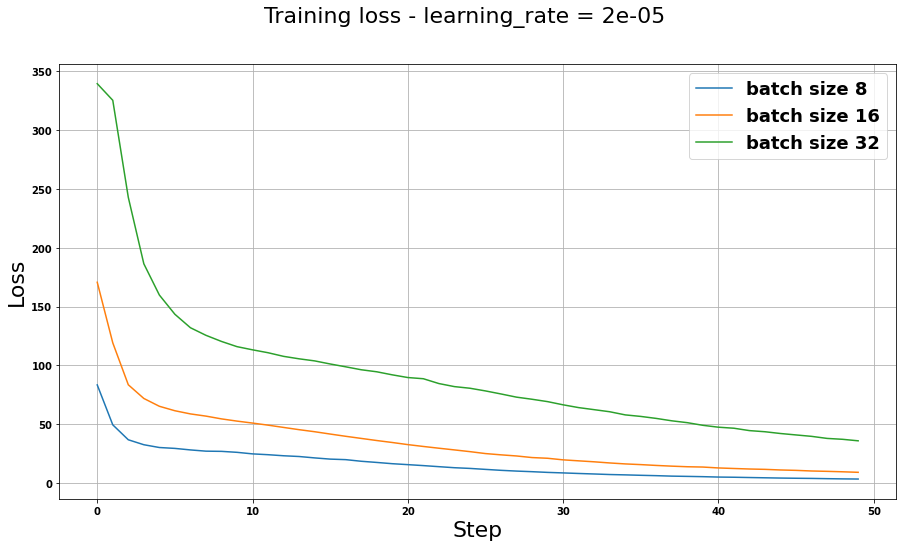

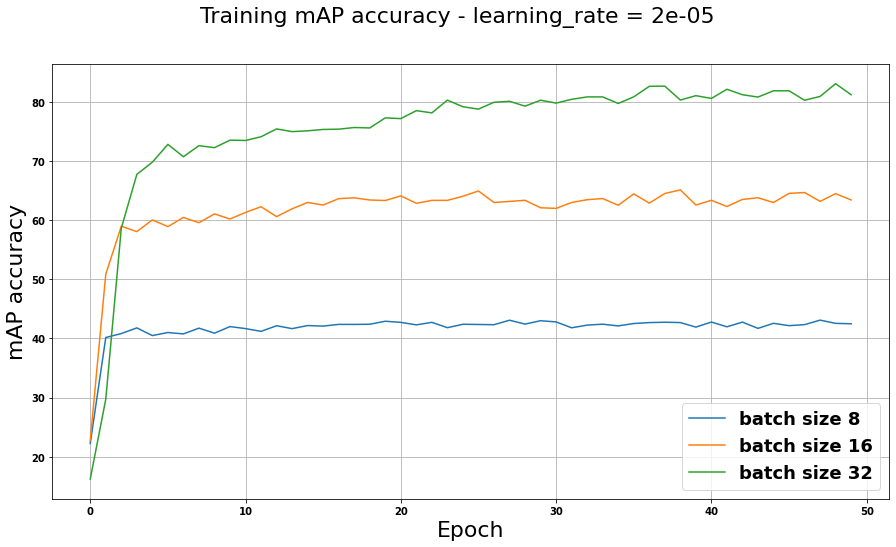

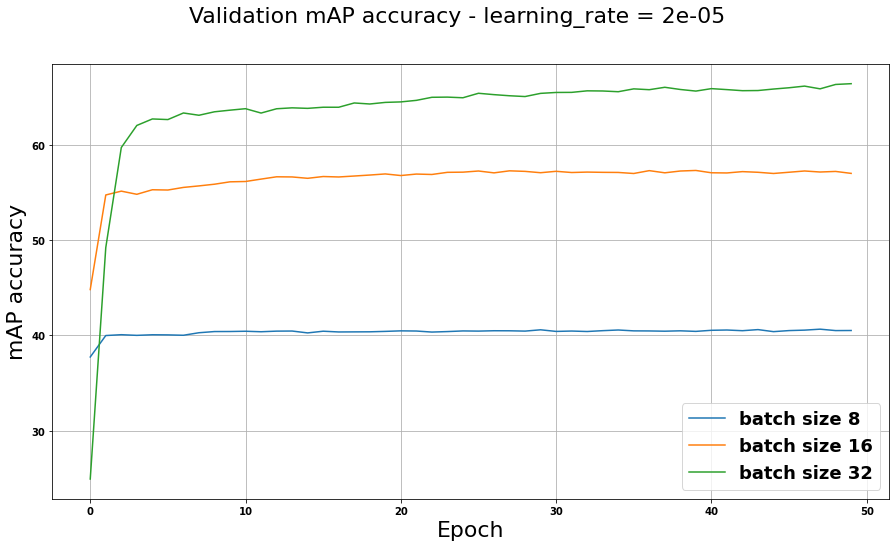

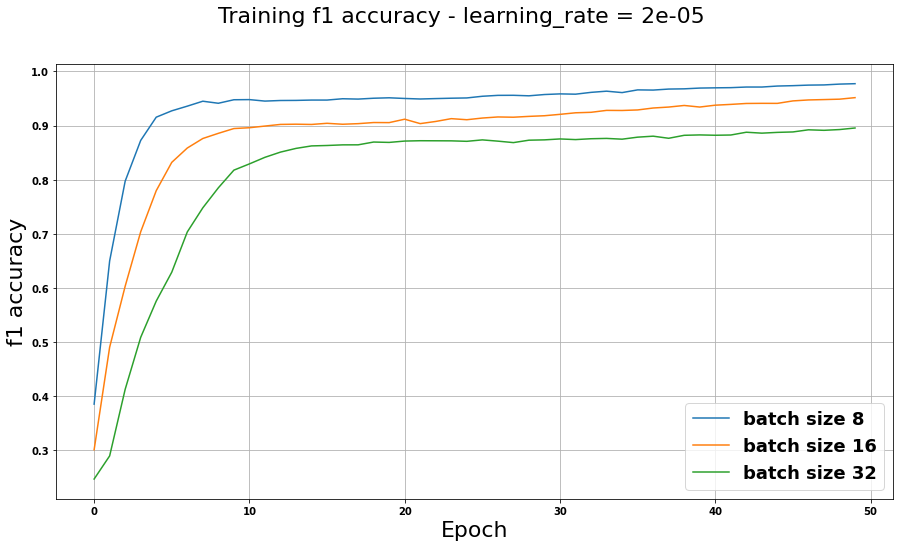

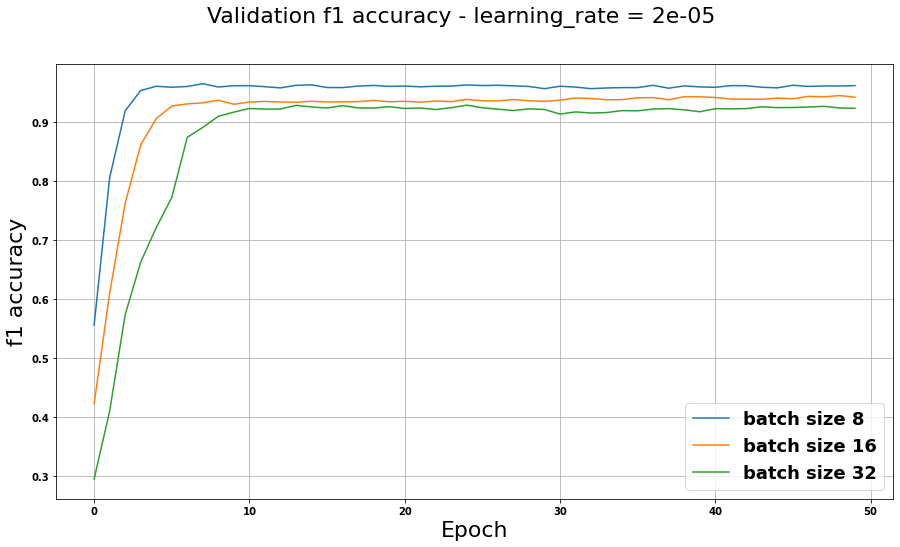

In [ ]:
batch_sizes = [8, 16, 32]
use_default_loss = False
epochs = 50
lr = 2e-5

fig1, ax1 = plt.subplots(1, figsize=(15,8))
fig1.suptitle(f'Training loss - learning_rate = {lr}', fontsize=22)
ax1.set_xlabel("Step", fontsize=22)
ax1.set_ylabel("Loss", fontsize=22)

fig2, ax2 = plt.subplots(1, figsize=(15,8))
fig2.suptitle(f'Training mAP accuracy - learning_rate = {lr}', fontsize=22)
ax2.set_xlabel("Epoch", fontsize=22)
ax2.set_ylabel("mAP accuracy", fontsize=22)

fig3, ax3 = plt.subplots(1, figsize=(15,8))
fig3.suptitle(f'Validation mAP accuracy - learning_rate = {lr}', fontsize=22)
ax3.set_xlabel("Epoch", fontsize=22)
ax3.set_ylabel("mAP accuracy", fontsize=22)

fig4, ax4 = plt.subplots(1, figsize=(15,8))
fig4.suptitle(f'Training f1 accuracy - learning_rate = {lr}', fontsize=22)
ax4.set_xlabel("Epoch", fontsize=22)
ax4.set_ylabel("f1 accuracy", fontsize=22)

fig5, ax5 = plt.subplots(1, figsize=(15,8))
fig5.suptitle(f'Validation f1 accuracy - learning_rate = {lr}', fontsize=22)
ax5.set_xlabel("Epoch", fontsize=22) 
ax5.set_ylabel("f1 accuracy", fontsize=22)

for batch_size in batch_sizes:

  file_names = [f'loss_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                f'train_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                f'validation_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                f'train_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                f'validation_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

  for i, filename in enumerate(file_names):
    file_path = os.path.join(load_path, filename)
    with open(file_path) as file:
      lines = file.readlines()
      lines = [line.rstrip() for line in lines]
      lines = [float(line) for line in lines]
      exec(f"ax{i+1}.plot(lines, label = f'batch size {batch_size}')")

ax1.legend(loc=1, prop={'size': 18})
ax1.grid()
ax2.legend(loc=4, prop={'size': 18})
ax2.grid()
ax3.legend(loc=4, prop={'size': 18})
ax3.grid()
ax4.legend(loc=4, prop={'size': 18})
ax4.grid()
ax5.legend(loc=4, prop={'size': 18})
ax5.grid()

plt.show(fig1)
plt.show(fig2)
plt.show(fig3)
plt.show(fig4)
plt.show(fig5)

In [ ]:
lr = 2e-5
learning_rates_text = ['2e-5']
batch_sizes = [8, 16, 32]
use_default_loss = True
epochs = 50

train_mAP_acc = pd.DataFrame(columns=batch_sizes, index=learning_rates_text)
validation_mAP_acc = pd.DataFrame(columns=batch_sizes, index=learning_rates_text)
train_f1_acc = pd.DataFrame(columns=batch_sizes, index=learning_rates_text)
validation_f1_acc = pd.DataFrame(columns=batch_sizes, index=learning_rates_text)

for batch_size in batch_sizes:

    file_names = [f'train_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'train_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
                  f'validation_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

    for j, filename in enumerate(file_names):
      file_path = os.path.join(load_path, filename)
      df = pd.read_csv(file_path, sep=" ", header=None)
      if j == 0:
        train_mAP_acc.loc[learning_rates_text[0], batch_size] = max(df[0])
      
      elif j == 1:
        validation_mAP_acc.loc[learning_rates_text[0], batch_size] = max(df[0])

      elif j == 2:
        train_f1_acc.loc[learning_rates_text[0], batch_size] = max(df[0])
      
      else:
        validation_f1_acc.loc[learning_rates_text[0], batch_size] = max(df[0])

print('\ntraining mAP acc results')
display(train_mAP_acc)
print('\nvalidation mAP acc results')
display(validation_mAP_acc)
print('\ntraining f1 acc results')
display(train_f1_acc)
print('\nvalidation f1 acc results')
display(validation_f1_acc)


training mAP acc results


,8,16,32
2e-5,43.102749,65.139279,83.10462



validation mAP acc results


,8,16,32
2e-5,40.659107,57.298496,66.394729



training f1 acc results


,8,16,32
2e-5,0.977361,0.951552,0.895462



validation f1 acc results


,8,16,32
2e-5,0.964609,0.944479,0.928236


### From the above size we can see that mAP score have better results on larger batches (32) while f1 score have better results on smaller batches (8).
### Now, compare ASL results with originall loss results  

# ASL vs original loss, lr = 2e-5, batch size = 8 

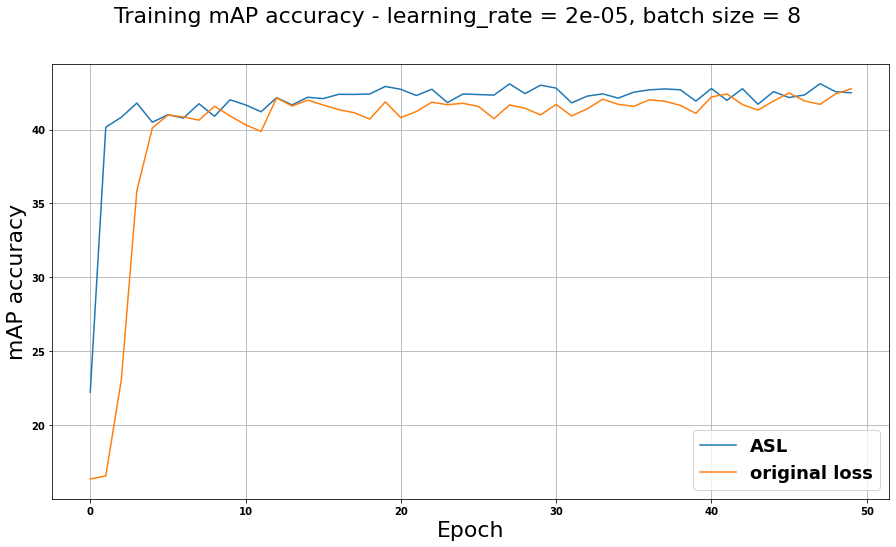

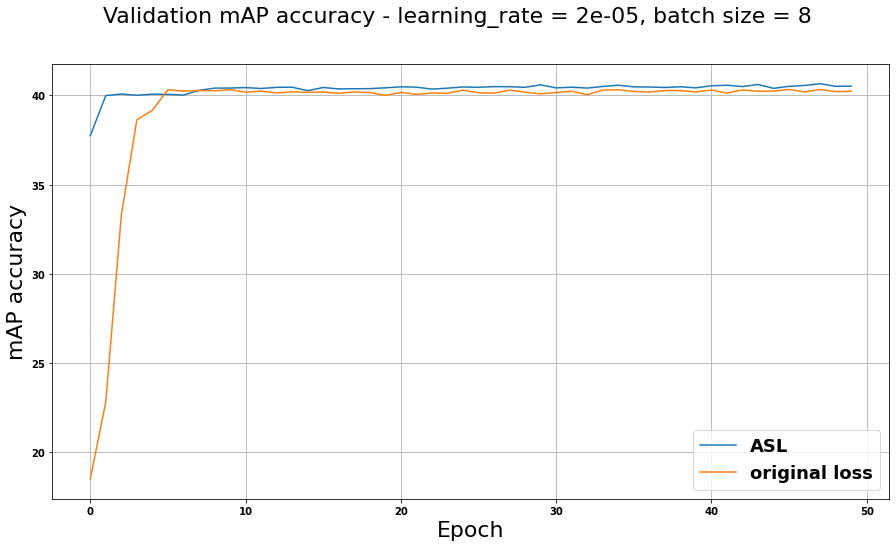

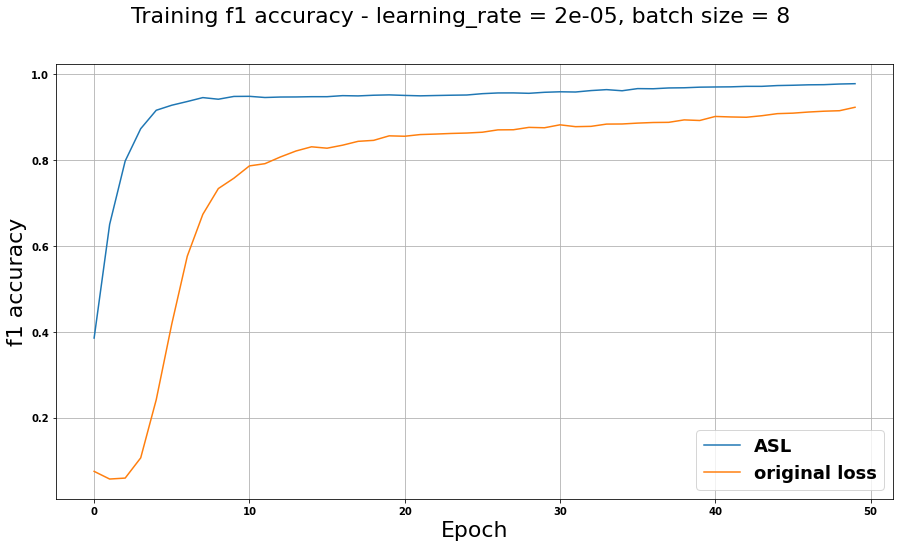

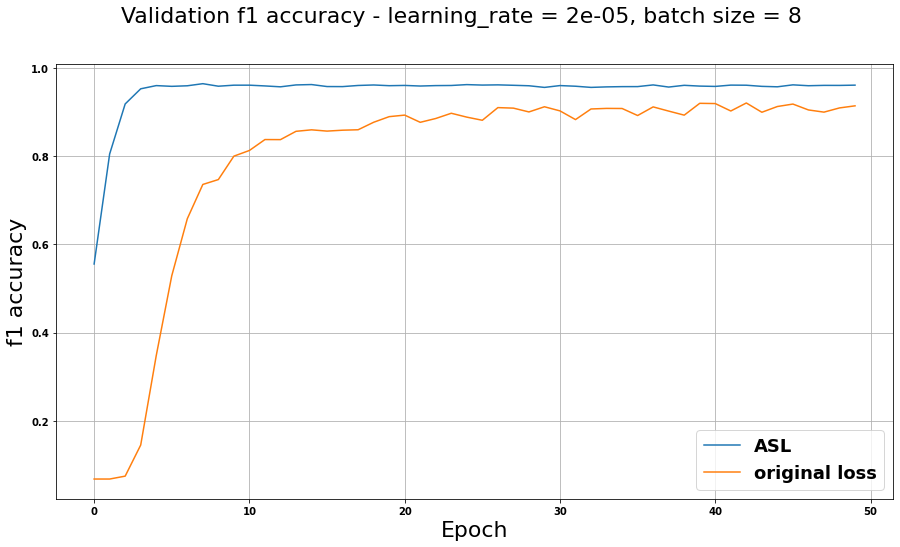

In [ ]:
batch_size = 8
use_default_loss = False
epochs = 50
lr = 2e-5

fig1, ax1 = plt.subplots(1, figsize=(15,8))
fig1.suptitle(f'Training mAP accuracy - learning_rate = {lr}, batch size = {batch_size}', fontsize=22)
ax1.set_xlabel("Epoch", fontsize=22)
ax1.set_ylabel("mAP accuracy", fontsize=22)

fig2, ax2 = plt.subplots(1, figsize=(15,8))
fig2.suptitle(f'Validation mAP accuracy - learning_rate = {lr}, batch size = {batch_size}', fontsize=22)
ax2.set_xlabel("Epoch", fontsize=22)
ax2.set_ylabel("mAP accuracy", fontsize=22)

fig3, ax3 = plt.subplots(1, figsize=(15,8))
fig3.suptitle(f'Training f1 accuracy - learning_rate = {lr}, batch size = {batch_size}', fontsize=22)
ax3.set_xlabel("Epoch", fontsize=22)
ax3.set_ylabel("f1 accuracy", fontsize=22)

fig4, ax4 = plt.subplots(1, figsize=(15,8))
fig4.suptitle(f'Validation f1 accuracy - learning_rate = {lr}, batch size = {batch_size}', fontsize=22)
ax4.set_xlabel("Epoch", fontsize=22) 
ax4.set_ylabel("f1 accuracy", fontsize=22)

file_names = [f'train_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'validation_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'train_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'validation_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

for i, filename in enumerate(file_names):
  file_path = os.path.join(load_path, filename)
  with open(file_path) as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
    lines = [float(line) for line in lines]
    exec(f"ax{i+1}.plot(lines, label = 'ASL')")

file_names = [f'train_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'validation_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'train_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'validation_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

for i, filename in enumerate(file_names):
  file_path = os.path.join(load_path, filename)
  with open(file_path) as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
    lines = [float(line) for line in lines]
    exec(f"ax{i+1}.plot(lines, label = 'original loss')")

ax1.legend(loc=4, prop={'size': 18})
ax1.grid()
ax2.legend(loc=4, prop={'size': 18})
ax2.grid()
ax3.legend(loc=4, prop={'size': 18})
ax3.grid()
ax4.legend(loc=4, prop={'size': 18})
ax4.grid()


plt.show(fig1)
plt.show(fig2)
plt.show(fig3)
plt.show(fig4)
plt.show(fig5)

# ASL vs original loss, lr = 2e-5, batch size = 32

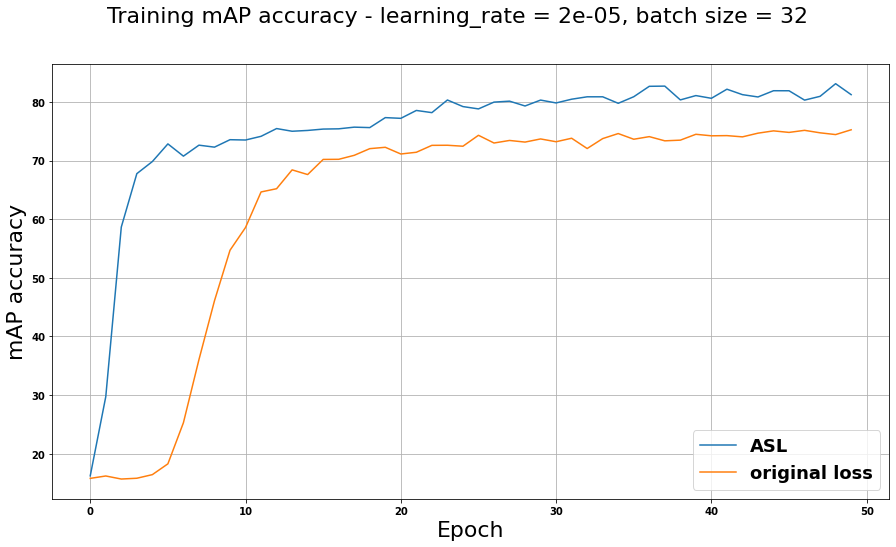

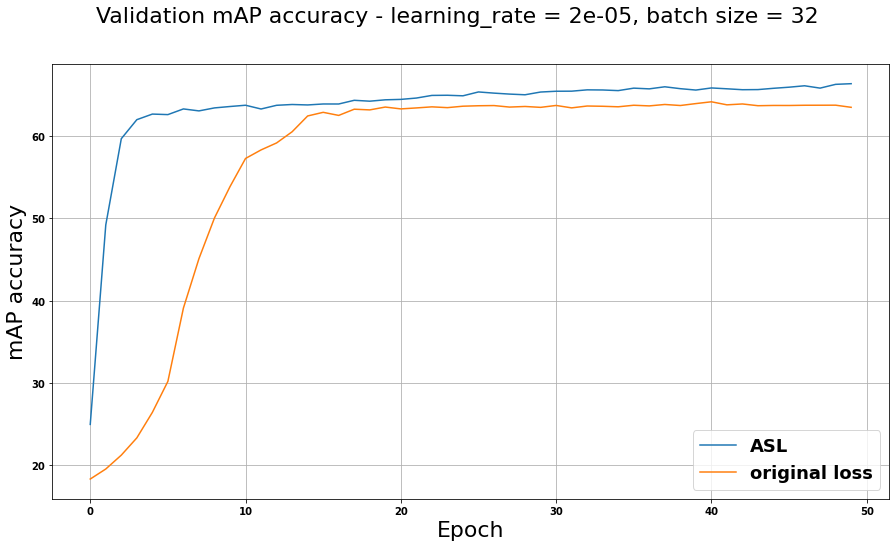

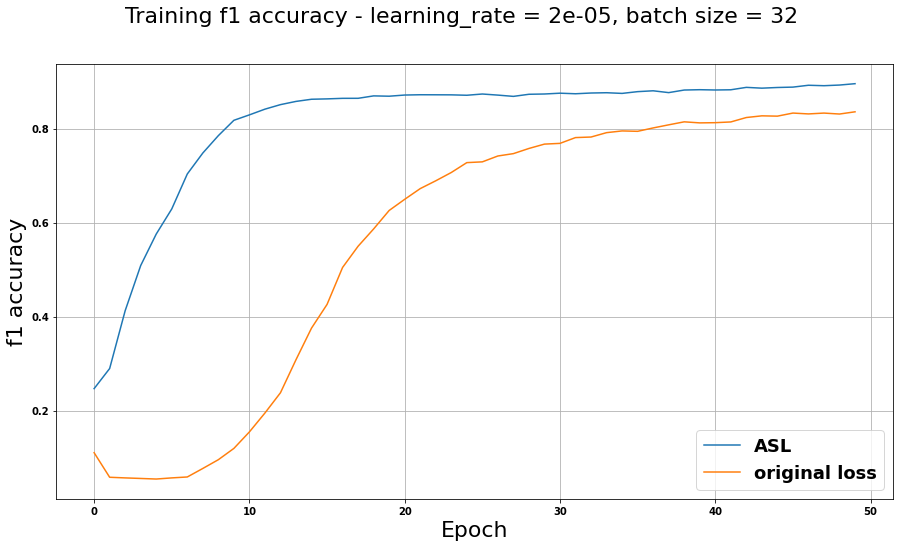

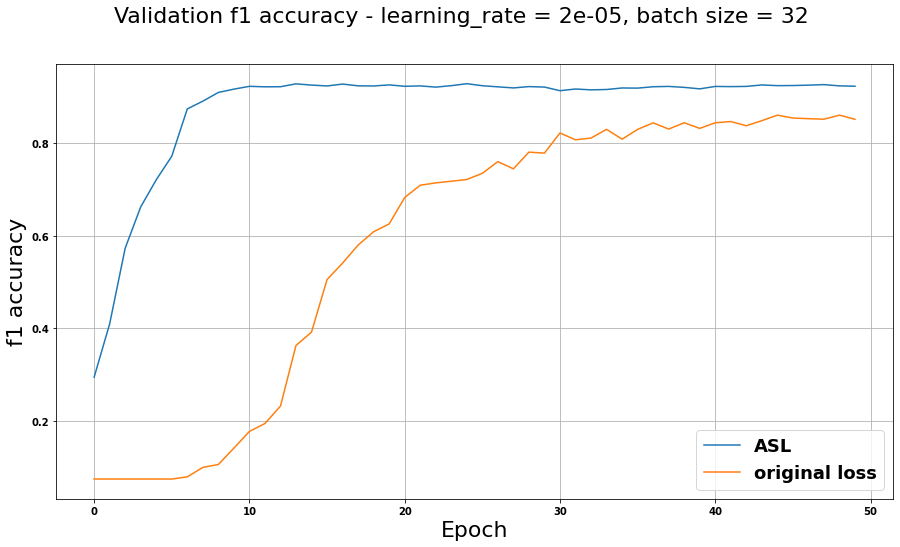

In [ ]:
batch_size = 32
use_default_loss = False
epochs = 50
lr = 2e-5

fig1, ax1 = plt.subplots(1, figsize=(15,8))
fig1.suptitle(f'Training mAP accuracy - learning_rate = {lr}, batch size = {batch_size}', fontsize=22)
ax1.set_xlabel("Epoch", fontsize=22)
ax1.set_ylabel("mAP accuracy", fontsize=22)

fig2, ax2 = plt.subplots(1, figsize=(15,8))
fig2.suptitle(f'Validation mAP accuracy - learning_rate = {lr}, batch size = {batch_size}', fontsize=22)
ax2.set_xlabel("Epoch", fontsize=22)
ax2.set_ylabel("mAP accuracy", fontsize=22)

fig3, ax3 = plt.subplots(1, figsize=(15,8))
fig3.suptitle(f'Training f1 accuracy - learning_rate = {lr}, batch size = {batch_size}', fontsize=22)
ax3.set_xlabel("Epoch", fontsize=22)
ax3.set_ylabel("f1 accuracy", fontsize=22)

fig4, ax4 = plt.subplots(1, figsize=(15,8))
fig4.suptitle(f'Validation f1 accuracy - learning_rate = {lr}, batch size = {batch_size}', fontsize=22)
ax4.set_xlabel("Epoch", fontsize=22) 
ax4.set_ylabel("f1 accuracy", fontsize=22)

file_names = [f'train_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'validation_mAP_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'train_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'validation_f1_acc_set_ASL_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

for i, filename in enumerate(file_names):
  file_path = os.path.join(load_path, filename)
  with open(file_path) as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
    lines = [float(line) for line in lines]
    exec(f"ax{i+1}.plot(lines, label = 'ASL')")

file_names = [f'train_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'validation_mAP_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'train_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt',
              f'validation_f1_acc_set_original_loss_lr_{lr}_batch_size_{batch_size}_{epochs}_epochs.txt']

for i, filename in enumerate(file_names):
  file_path = os.path.join(load_path, filename)
  with open(file_path) as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
    lines = [float(line) for line in lines]
    exec(f"ax{i+1}.plot(lines, label = 'original loss')")

ax1.legend(loc=4, prop={'size': 18})
ax1.grid()
ax2.legend(loc=4, prop={'size': 18})
ax2.grid()
ax3.legend(loc=4, prop={'size': 18})
ax3.grid()
ax4.legend(loc=4, prop={'size': 18})
ax4.grid()


plt.show(fig1)
plt.show(fig2)
plt.show(fig3)
plt.show(fig4)
plt.show(fig5)